In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [5]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cuamba
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | teya
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | berdigestyakh
Processing Record 9 of Set 1 | palmer
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | san cristobal
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hay river
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | viligili
City not found. Skipping...
Processing Record 17 of Set 1 | karaton
Processing Record 18 of Set 1 | samusu
City not found. Skipping...
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | punta arena

Processing Record 37 of Set 4 | richards bay
Processing Record 38 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 39 of Set 4 | kirakira
Processing Record 40 of Set 4 | marsh harbour
Processing Record 41 of Set 4 | faya
Processing Record 42 of Set 4 | mizdah
Processing Record 43 of Set 4 | namatanai
Processing Record 44 of Set 4 | naqadeh
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | krasnyy chikoy
Processing Record 47 of Set 4 | oussouye
Processing Record 48 of Set 4 | shingu
Processing Record 49 of Set 4 | verkh-suetka
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | tazovskiy
Processing Record 2 of Set 5 | novocheremshansk
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | tateyama
Processing Record 6 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 5 | benghazi
Processing Record 8 of Set 5 | dal

Processing Record 27 of Set 8 | linguere
Processing Record 28 of Set 8 | pampas
Processing Record 29 of Set 8 | mayumba
Processing Record 30 of Set 8 | bud
Processing Record 31 of Set 8 | tuatapere
Processing Record 32 of Set 8 | champerico
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | kobojango
City not found. Skipping...
Processing Record 36 of Set 8 | riyadh
Processing Record 37 of Set 8 | waingapu
Processing Record 38 of Set 8 | brae
Processing Record 39 of Set 8 | methoni
Processing Record 40 of Set 8 | christchurch
Processing Record 41 of Set 8 | gandu
Processing Record 42 of Set 8 | portobelo
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 45 of Set 8 | yaan
Processing Record 46 of Set 8 | pueblo
Processing Record 47 of Set 8 | khonuu
City not found. Skipping...
Processing Record 48 of Set 8 | aranos
Processing Record 49 of Set 8 | 

Processing Record 15 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 12 | kil
Processing Record 17 of Set 12 | bisignano
Processing Record 18 of Set 12 | hessisch oldendorf
Processing Record 19 of Set 12 | lubango
Processing Record 20 of Set 12 | saint-joseph
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | sao jose da coroa grande
Processing Record 23 of Set 12 | qafsah
City not found. Skipping...
Processing Record 24 of Set 12 | larap
Processing Record 25 of Set 12 | mindszent
Processing Record 26 of Set 12 | berlevag
Processing Record 27 of Set 12 | manaus
Processing Record 28 of Set 12 | kyzyl-suu
Processing Record 29 of Set 12 | muzhi
Processing Record 30 of Set 12 | port blair
Processing Record 31 of Set 12 | lensk
Processing Record 32 of Set 12 | jiuquan
Processing Record 33 of Set 12 | mul
Processing Record 34 of Set 12 | dawei
Processing Record 35 of Set 12 | myrtle beach
Processing Record 36 of S

In [9]:
len(city_data)

581

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cuamba,-14.8031,36.5372,69.03,92,99,1.97,MZ,2022-01-17 21:37:13
1,Albany,42.6001,-73.9662,36.63,83,99,6.69,US,2022-01-17 21:32:32
2,Teya,60.3778,92.6267,22.32,86,100,10.98,RU,2022-01-17 21:37:13
3,Clyde River,70.4692,-68.5914,-19.97,76,20,11.50,CA,2022-01-17 21:37:14
4,Kapaa,22.0752,-159.3190,77.47,74,40,1.01,US,2022-01-17 21:35:05
5,Kavieng,-2.5744,150.7967,81.36,76,99,1.57,PG,2022-01-17 21:37:14
6,Westport,41.1415,-73.3579,38.08,76,100,1.99,US,2022-01-17 21:35:13
7,Berdigestyakh,62.0989,126.6992,-40.25,100,62,1.63,RU,2022-01-17 21:37:15
8,Palmer,42.1584,-72.3287,37.92,75,100,5.99,US,2022-01-17 21:34:47
9,San Cristobal,7.7669,-72.2250,78.98,59,100,2.37,VE,2022-01-17 21:36:09


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cuamba,MZ,2022-01-17 21:37:13,-14.8031,36.5372,69.03,92,99,1.97
1,Albany,US,2022-01-17 21:32:32,42.6001,-73.9662,36.63,83,99,6.69
2,Teya,RU,2022-01-17 21:37:13,60.3778,92.6267,22.32,86,100,10.98
3,Clyde River,CA,2022-01-17 21:37:14,70.4692,-68.5914,-19.97,76,20,11.50
4,Kapaa,US,2022-01-17 21:35:05,22.0752,-159.3190,77.47,74,40,1.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

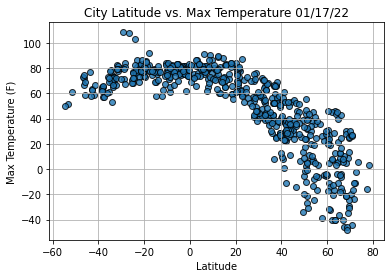

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

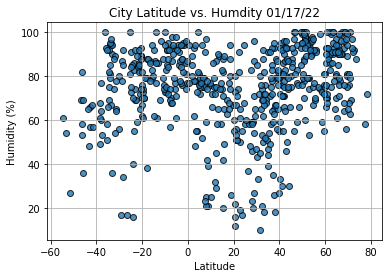

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

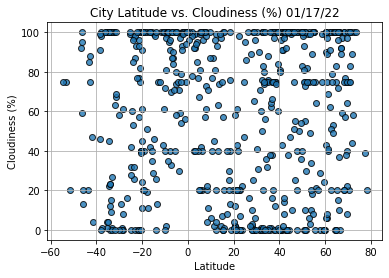

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

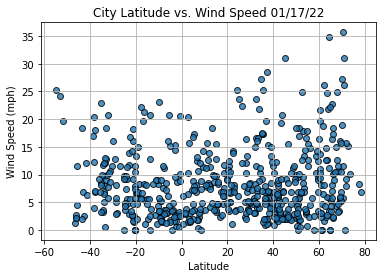

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, str_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

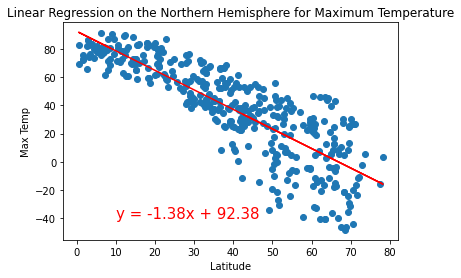

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-40))

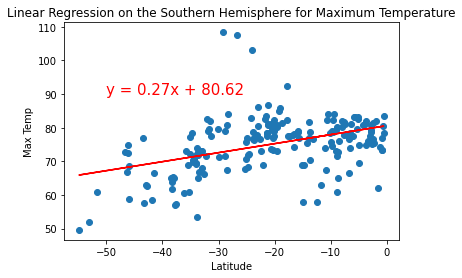

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

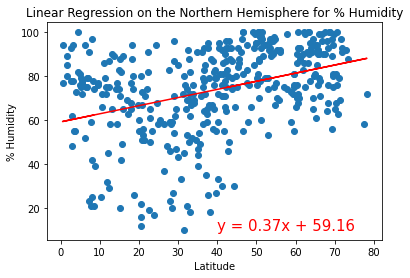

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

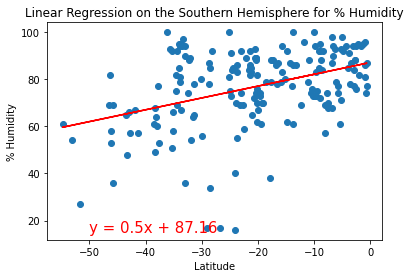

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

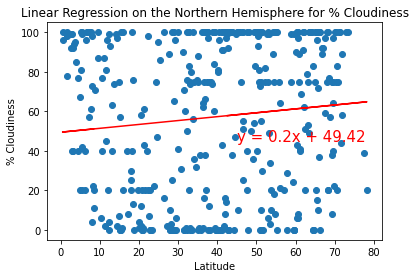

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(45,45))

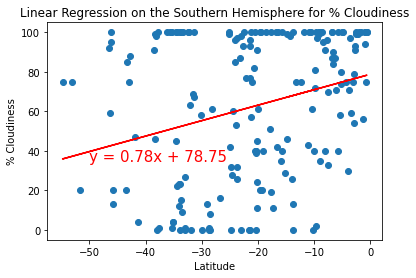

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,35))

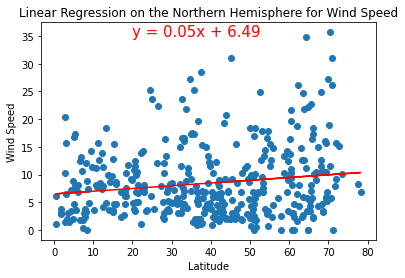

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(20,35))

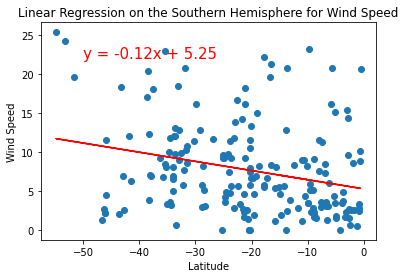

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,22))